In [2]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python {}'.format(sys.version))

print('Sklearn {}'.format(sklearn.__version__))

print('Matplotlib {}'.format(matplotlib.__version__))

print('Numpy {}'.format(np.__version__))

Python 2.7.16 |Anaconda, Inc.| (default, Mar 14 2019, 15:42:17) [MSC v.1500 64 bit (AMD64)]
Sklearn 0.20.3
Matplotlib 2.2.3
Numpy 1.16.2


In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
import sys
import sklearn
import matplotlib
import numpy as np

print('Python {}'.format(sys.version))

print('Sklearn {}'.format(sklearn.__version__))

print('Matplotlib {}'.format(matplotlib.__version__))

print('Numpy {}'.format(np.__version__))


Python 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
Sklearn 0.21.1
Matplotlib 3.1.0
Numpy 1.16.4


In [8]:
print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [9]:
print('Training Data: {}'.format(x_test.shape))
print('Training Labels: {}'.format(y_test.shape))

Training Data: (10000, 28, 28)
Training Labels: (10000,)


In [10]:
import matplotlib.pyplot as plt

# puthon magic function  /../
%matplotlib inline

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


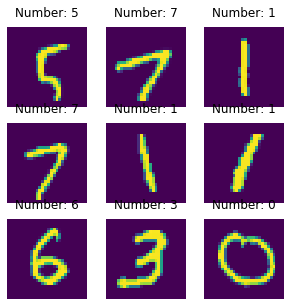

In [15]:
# creating figures with matplotlib,pyplot

fig, axs = plt.subplots(3, 3, figsize = (5, 5))

#looping through all the subplots and all the images from mnist dataset

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[100 + i])
    ax.axis('off')
    ax.set_title('Number: {}'.format(y_train[100 + i]))
    

#displaying the figure 

fig.show()

In [16]:
# convert each of the image into a one dimensional array

X = x_train.reshape(len(x_train), -1)
Y = y_train

In [19]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [20]:
# convert each of the image into a one dimensional array

X = x_train.reshape(len(x_train), -1)
Y = y_train

# normalising the data from 0 to 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)
print(X[0])

(60000, 784)
(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.

In [24]:
from sklearn.cluster import MiniBatchKMeans

n_digits = len(np.unique(y_test))
print(n_digits)

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = n_digits)

# Fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [25]:
kmeans.labels_[:20]

array([3, 0, 1, 6, 5, 7, 9, 3, 9, 5, 3, 6, 4, 2, 9, 5, 7, 6, 8, 5])

In [26]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}  #dictionary in python

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [29]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[3 0 9 1 7 2 1 3 1 7 3 1 3 6 1 7 2 1 5 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [31]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))  #spread of the cluster ,,comparing performance 
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [32]:
clusters = [10, 16, 36, 64, 144, 256, 400]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2420316.069099987
Homogeneity: 0.44876931556534577
Accuracy: 0.5512333333333334

Number of Clusters: 16
Inertia: 2214346.425762278
Homogeneity: 0.5633134479510863
Accuracy: 0.6493

Number of Clusters: 36
Inertia: 1960545.7553799762
Homogeneity: 0.6828301724232186
Accuracy: 0.7497333333333334

Number of Clusters: 64
Inertia: 1817921.1458742856
Homogeneity: 0.7482140581322663
Accuracy: 0.8236

Number of Clusters: 144
Inertia: 1633796.950405039
Homogeneity: 0.808501544246856
Accuracy: 0.8716833333333334

Number of Clusters: 256
Inertia: 1518108.6173122884
Homogeneity: 0.8385462438482097
Accuracy: 0.8963



C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cluster\k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cluster\k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cluster\k_means_.py:1558: RuntimeWarning: init_size=300 should be larger than k=400. Setting it to 3*k
  init_size=init_size)


Number of Clusters: 400
Inertia: 1434897.876949392
Homogeneity: 0.8637365717671517
Accuracy: 0.91265



In [33]:
# test kmeans algorithm on testing dataset
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

# initialize and fit KMeans algorithm on training data
kmeans = MiniBatchKMeans(n_clusters = 256)  #400 takes more time and does nothing better in accuracy 
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

# predict labels for testing data
test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.8979



C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


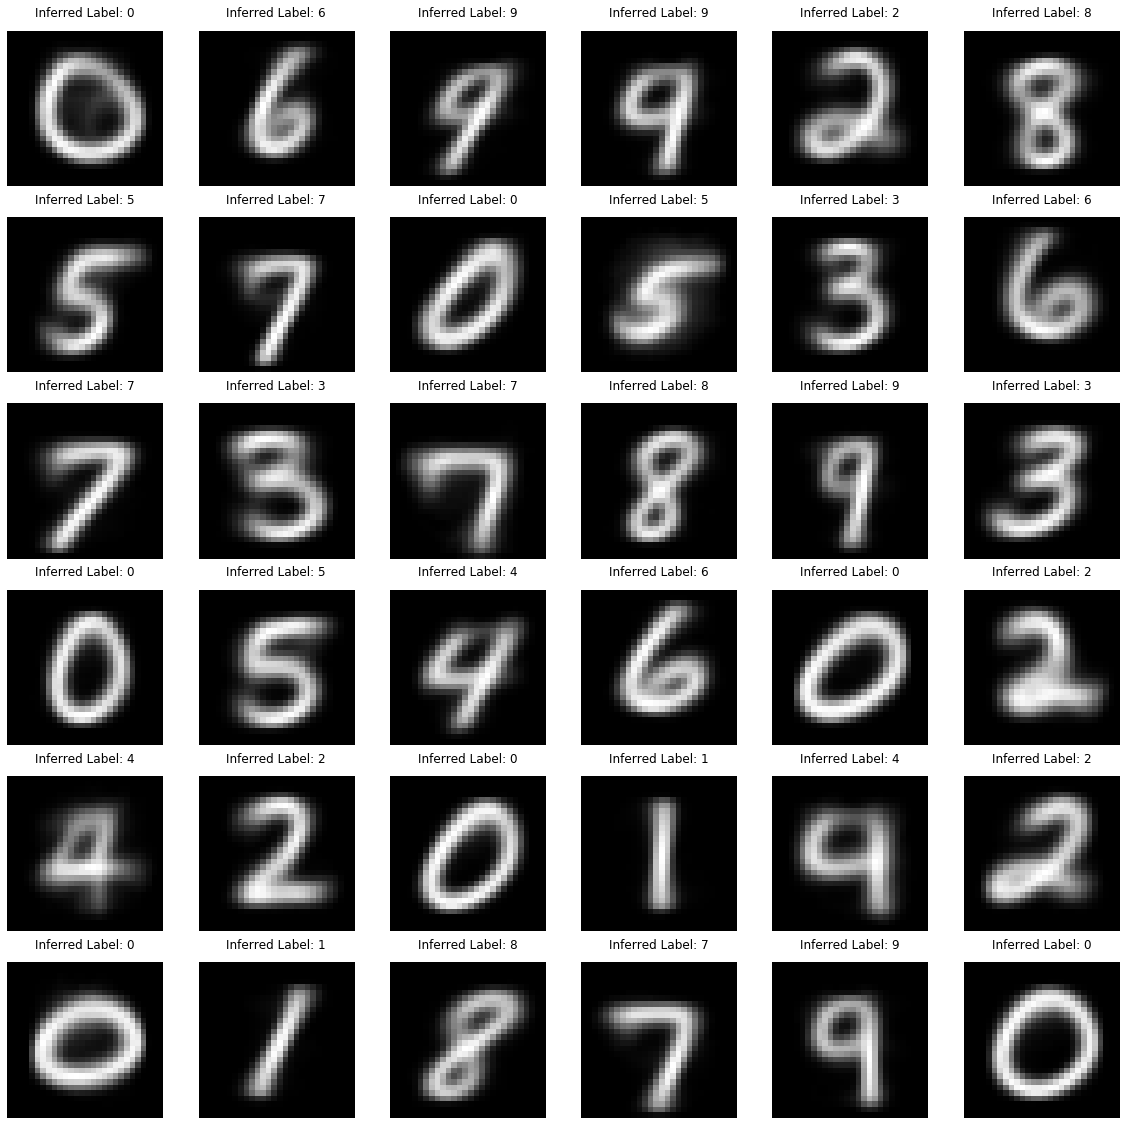

In [34]:
# coolest part of the project.// //  //  //  //  //  
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images, reverse the one dimensional array in 28*28 image
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.int)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


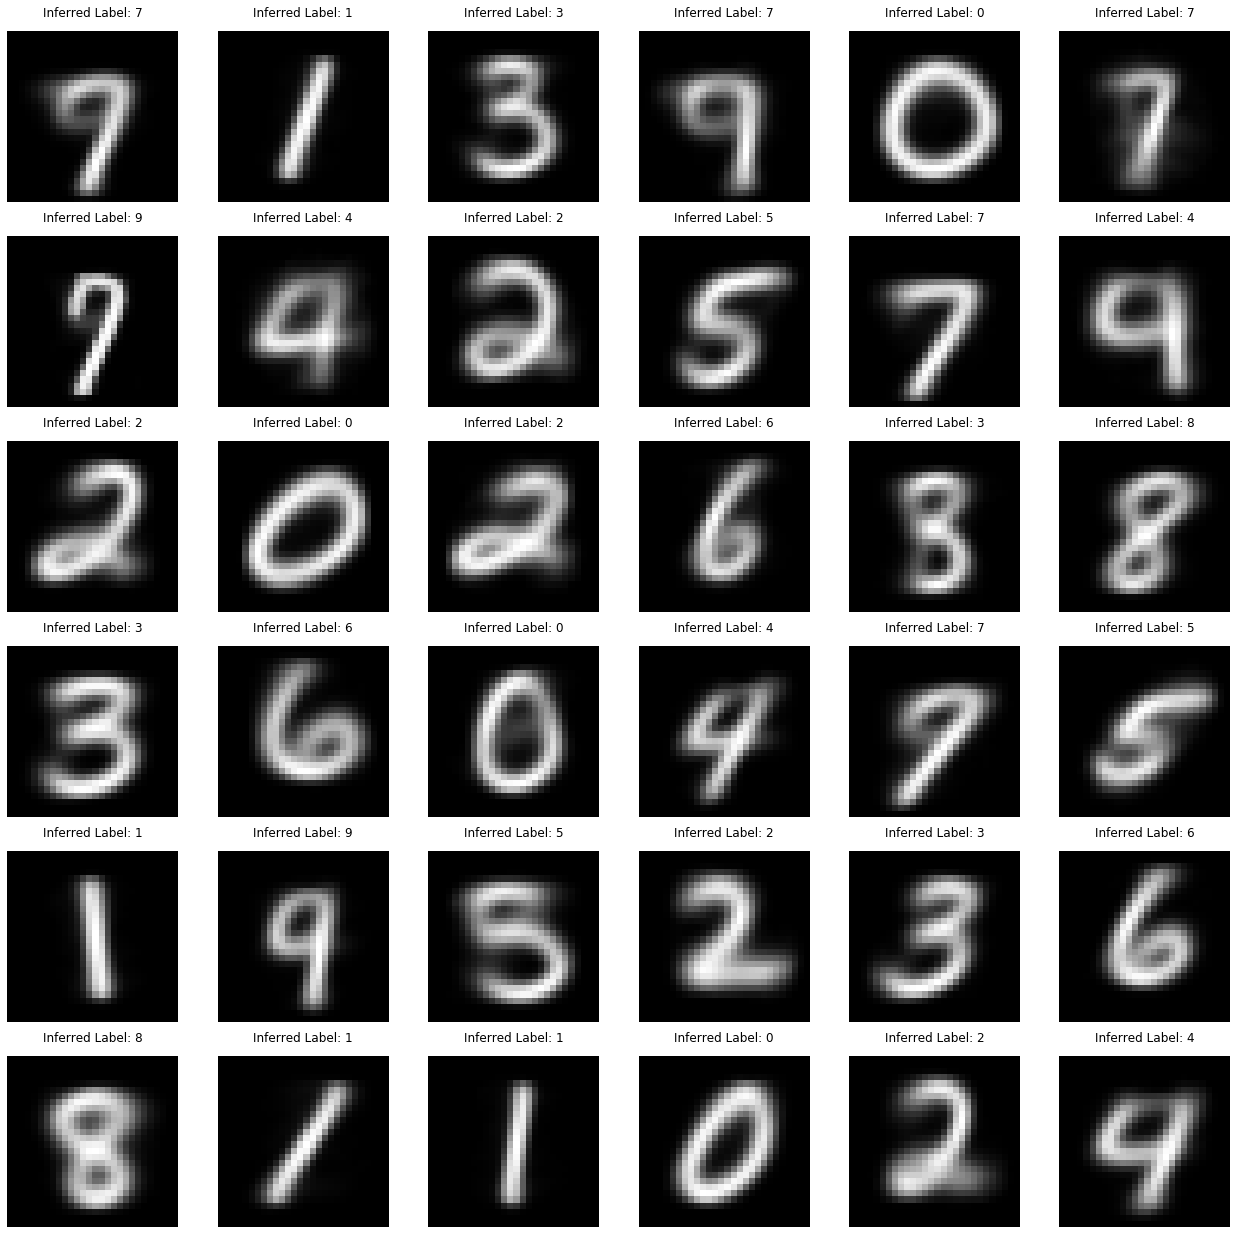

In [37]:
# coolest part of the project.// //  //  //  //  //  
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images, reverse the one dimensional array in 28*28 image
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (22, 22))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()